<a href="https://colab.research.google.com/github/miukikire/python4001/blob/main/hw6_%E5%BC%B5%E8%94%9A%E6%A1%93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

讀取資料

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/ThousandAI/pycs4001/main/class08/drug200.csv")
print(data.head(5))

x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

dummy_x = pd.get_dummies(x)

from sklearn.model_selection import train_test_split
dummy_x = np.array(dummy_x)

train_x, test_x, train_y, test_y = train_test_split(dummy_x, y, test_size=0.2, random_state=10)

print(f"train_x shape:  {train_x.shape}")
print(f"test_x shape: {test_x.shape}")

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY
train_x shape:  (160, 9)
test_x shape: (40, 9)


搭建模型

In [10]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion="entropy", max_depth = 4, random_state=10)


訓練模型

In [12]:
dc.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

評估模型

In [13]:
from sklearn import metrics
y_pred = dc.predict(test_x)
print("DecisionTree Accuracy: ", metrics.accuracy_score(test_y, y_pred))

DecisionTree Accuracy:  1.0


[Text(0.625, 0.9, 'X[1] <= 14.829\nentropy = 1.915\nsamples = 160\nvalue = [17, 13, 10, 45, 75]'),
 Text(0.5, 0.7, 'X[4] <= 0.5\nentropy = 1.728\nsamples = 85\nvalue = [17, 13, 10, 45, 0]'),
 Text(0.25, 0.5, 'X[5] <= 0.5\nentropy = 0.684\nsamples = 55\nvalue = [0, 0, 10, 45, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 0, 29, 0]'),
 Text(0.375, 0.3, 'X[7] <= 0.5\nentropy = 0.961\nsamples = 26\nvalue = [0, 0, 10, 16, 0]'),
 Text(0.25, 0.1, 'entropy = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0, 0]'),
 Text(0.75, 0.5, 'X[0] <= 50.5\nentropy = 0.987\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.625, 0.3, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 75\nvalue = [0, 0, 0, 0, 75]')]

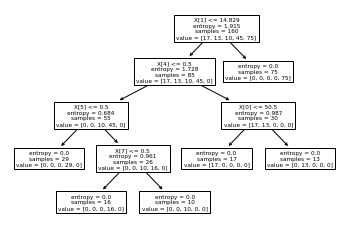

In [14]:
from sklearn import tree
tree.plot_tree(dc)

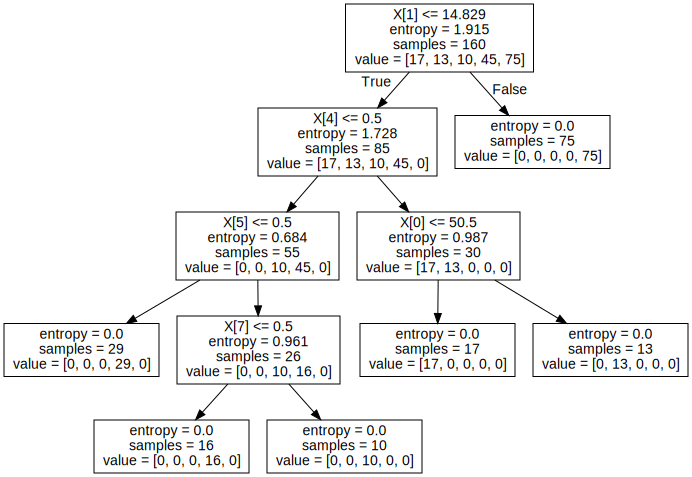

In [19]:
import graphviz
dot_data = tree.export_graphviz(dc)
graph = graphviz.Source(dot_data, format="png") 
graph

In [20]:
text_representation = tree.export_text(dc)
print(text_representation)

|--- feature_1 <= 14.83
|   |--- feature_4 <= 0.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: drugX
|   |   |--- feature_5 >  0.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- class: drugX
|   |   |   |--- feature_7 >  0.50
|   |   |   |   |--- class: drugC
|   |--- feature_4 >  0.50
|   |   |--- feature_0 <= 50.50
|   |   |   |--- class: drugA
|   |   |--- feature_0 >  50.50
|   |   |   |--- class: drugB
|--- feature_1 >  14.83
|   |--- class: drugY



In [25]:
!pip install dtreeviz
from dtreeviz.trees import dtreeviz

viz = dtreeviz(dc)

viz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


AttributeError: ignored